In [1]:
%matplotlib inline

from HeaderP import *
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
plt.rcParams.keys()
plt.rc('font', family='serif')
params = {
   'axes.labelsize': 30,
   'axes.linewidth': 1.5,
   'legend.fontsize': 25,
   'legend.frameon': False,
   'lines.linewidth': 2,
   'xtick.direction': 'in',
   'xtick.labelsize': 25,
   'xtick.major.bottom': True,
   'xtick.major.pad': 10,
   'xtick.major.size': 10,
   'xtick.major.width': 1,
   'xtick.minor.bottom': True,
   'xtick.minor.pad': 3.5,
   'xtick.minor.size': 5,
   'xtick.minor.top': True,
   'xtick.minor.visible': True,
   'xtick.minor.width': 1,
   'xtick.top': True,
   'ytick.direction': 'in',
   'ytick.labelsize': 25,
   'ytick.major.pad': 10,
   'ytick.major.size': 10,
   'ytick.major.width': 1,
   'ytick.minor.pad': 3.5,
   'ytick.minor.size': 5,
   'ytick.minor.visible': True,
   'ytick.minor.width': 1,
   'ytick.right': True,
   'figure.figsize': [10,10], # instead of 4.5, 4.5
   'savefig.format': 'eps',
   }
plt.rcParams.update(params)


    

/Users/lucy/anaconda3/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence
/Users/lucy/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:18: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Iterable
/Users/lucy/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:16: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Mapping, namedtuple, defaultdict, Sequence
/Users/lucy/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module 

In [13]:
APOGEE_age=readfits('apogee_astroNN-DR16-v1.fits')

In [14]:
cannonage=pd.read_pickle('CannonDR16_cut.pkl')

In [15]:
cmage=pd.merge(APOGEE_age[['age','APOGEE_ID']],cannonage,left_on='APOGEE_ID',right_on='APOGEE_ID',how='inner')

(0, 15)

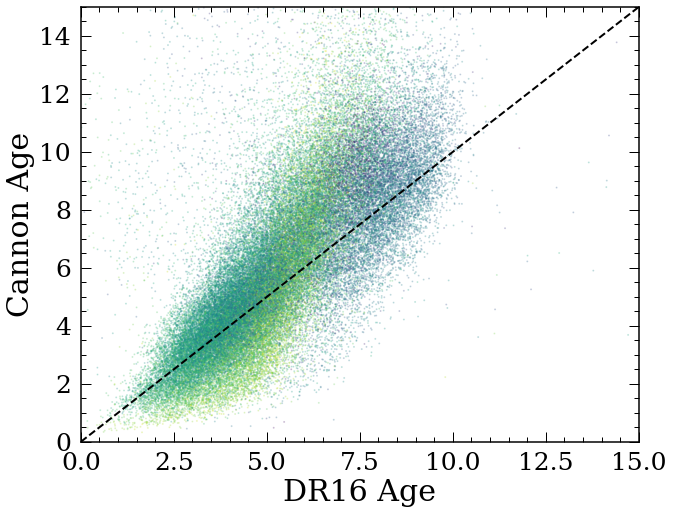

In [16]:
plt.figure(figsize=(10,8))
plt.scatter(cmage['age'],10**cmage['LogAge']/1000,c=cmage['M_H'],s=1,alpha=0.2)
plt.xlabel('DR16 Age')
plt.ylabel('Cannon Age')
plt.plot([0,15],[0,15],'k--')
plt.xlim([0,15])
plt.ylim([0,15])

(0, 17)

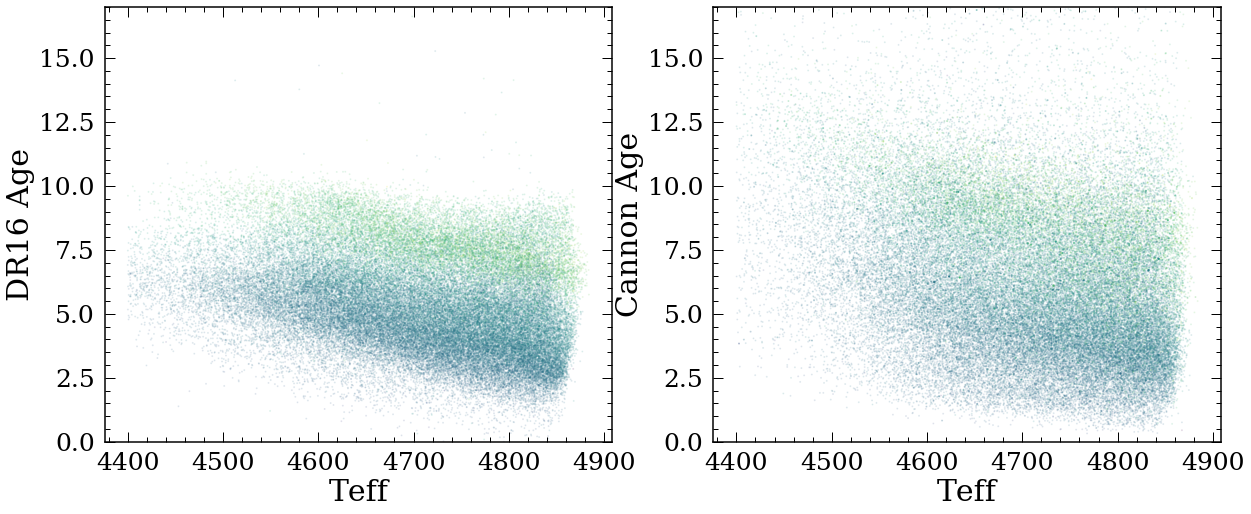

In [17]:
plt.figure(figsize=(20,8))
#cmage=cmage.loc[cmage['ALPHA_M']>0.1]
plt.subplot(1,2,1)
plt.scatter(cmage['TEFF'],cmage['age'],c=cmage['ALPHA_M'],s=1,alpha=0.1)
plt.xlabel('Teff')
plt.ylabel('DR16 Age')
plt.ylim([0,17])
plt.subplot(1,2,2)
plt.scatter(cmage['TEFF'],cmage['Age'],c=cmage['ALPHA_M'],s=1,alpha=0.1)
plt.xlabel('Teff')
plt.ylabel('Cannon Age')
plt.ylim([0,17])

In [43]:
cmage['abs_G']=m_to_M(cmage['GAIA_PHOT_G_MEAN_MAG'],1/cmage['GAIA_PARALLAX'])

/Users/lucy/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


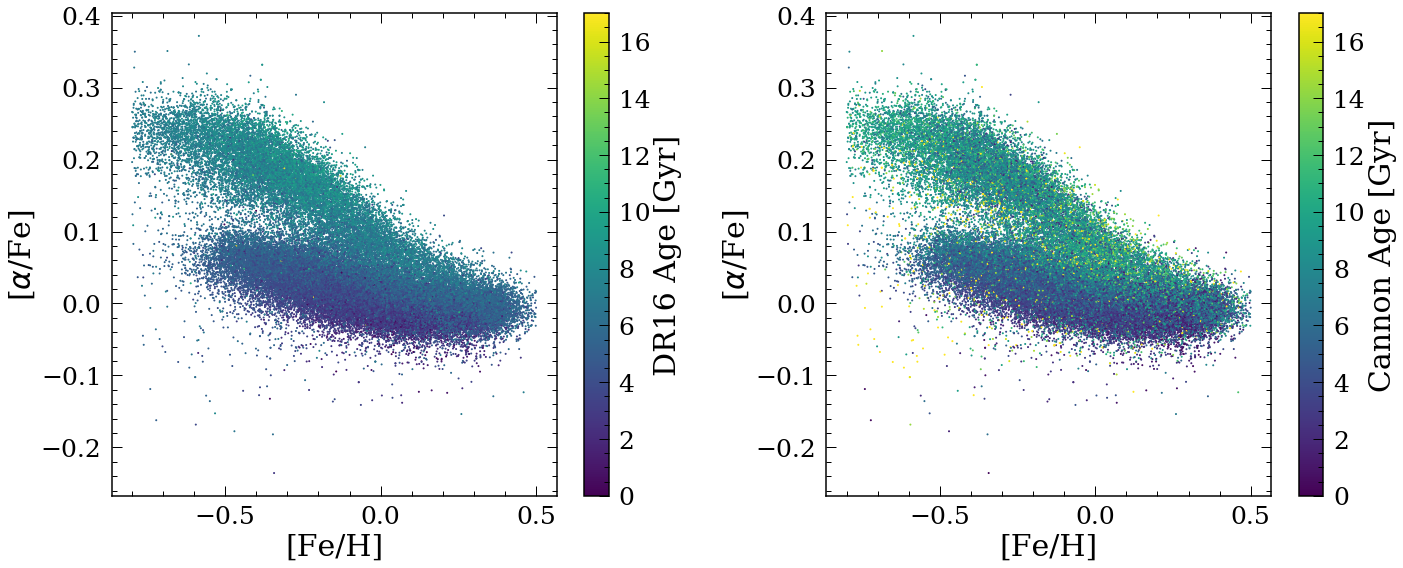

In [9]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.scatter(cmage['M_H'],cmage['ALPHA_M'],c=cmage['age'],s=1,vmin=0,vmax=17)
plt.xlabel('[Fe/H]')
plt.ylabel('[$\\alpha$/Fe]')
cb=plt.colorbar()
cb.set_label('DR16 Age [Gyr]')

plt.subplot(1,2,2)
plt.scatter(cmage['M_H'],cmage['ALPHA_M'],c=cmage['Age'],s=1,vmin=0,vmax=17)
plt.xlabel('[Fe/H]')
plt.ylabel('[$\\alpha$/Fe]')
cb=plt.colorbar()
cb.set_label('Cannon Age [Gyr]')
plt.tight_layout()

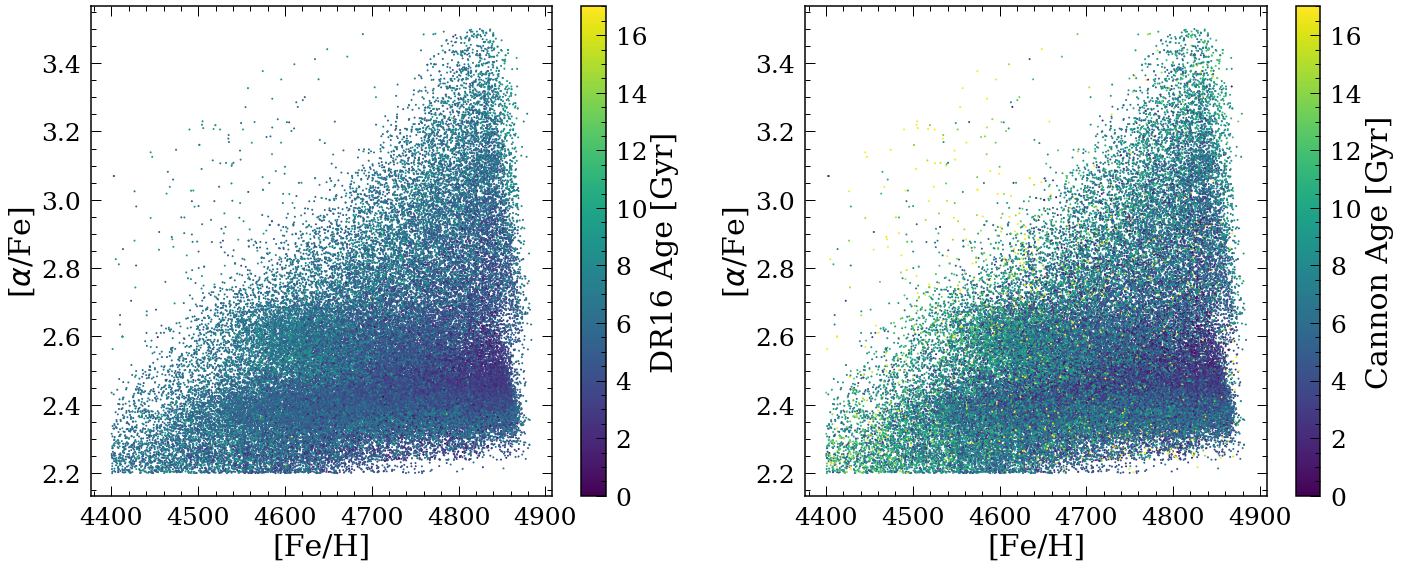

In [10]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.scatter(cmage['TEFF'],cmage['LOGG'],c=cmage['age'],s=1,vmin=0,vmax=17)
plt.xlabel('teff')
plt.ylabel('logg')
cb=plt.colorbar()
cb.set_label('DR16 Age [Gyr]')

plt.subplot(1,2,2)
plt.scatter(cmage['TEFF'],cmage['LOGG'],c=cmage['Age'],s=1,vmin=0,vmax=17)
plt.xlabel('teff')
plt.ylabel('logg')
cb=plt.colorbar()
cb.set_label('Cannon Age [Gyr]')
plt.tight_layout()

Text(0.5, 1.0, 'Age distrubution of 69144 giant stars in APOGEE DR16')

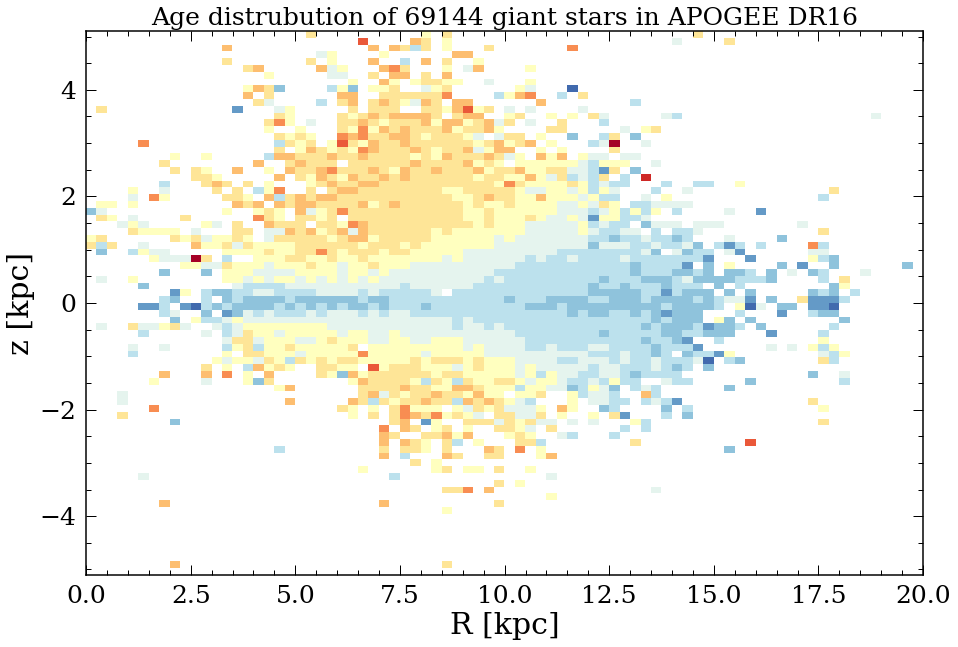

In [28]:

x1,x2,y1,y2 = 0,20,-5.1,5.1
lims = [x1,x2,y1,y2]
lims = np.array(lims)
binnum = 80

cmap1 = plt.cm.get_cmap('RdYlBu_r',13)
cmap1.set_bad('white',1.)


plt.figure(figsize=(15,10))

image=makeagemap_each(cmage['R'].values,cmage['z'].values,
                cmage['age'].values,lims, binnum)
plt.imshow(image.T, interpolation="nearest" ,aspect = 'auto',origin = 'lower', 
           extent = (x1,x2, y1,y2),cmap=cmap1, vmin=0,vmax=13)

plt.xlabel('R [kpc]')
plt.ylabel('z [kpc]')
plt.title('Age distrubution of %d giant stars in APOGEE DR16'%len(cmage),fontsize=25)


100%|██████████| 9/9 [00:00<00:00, 55.18it/s]


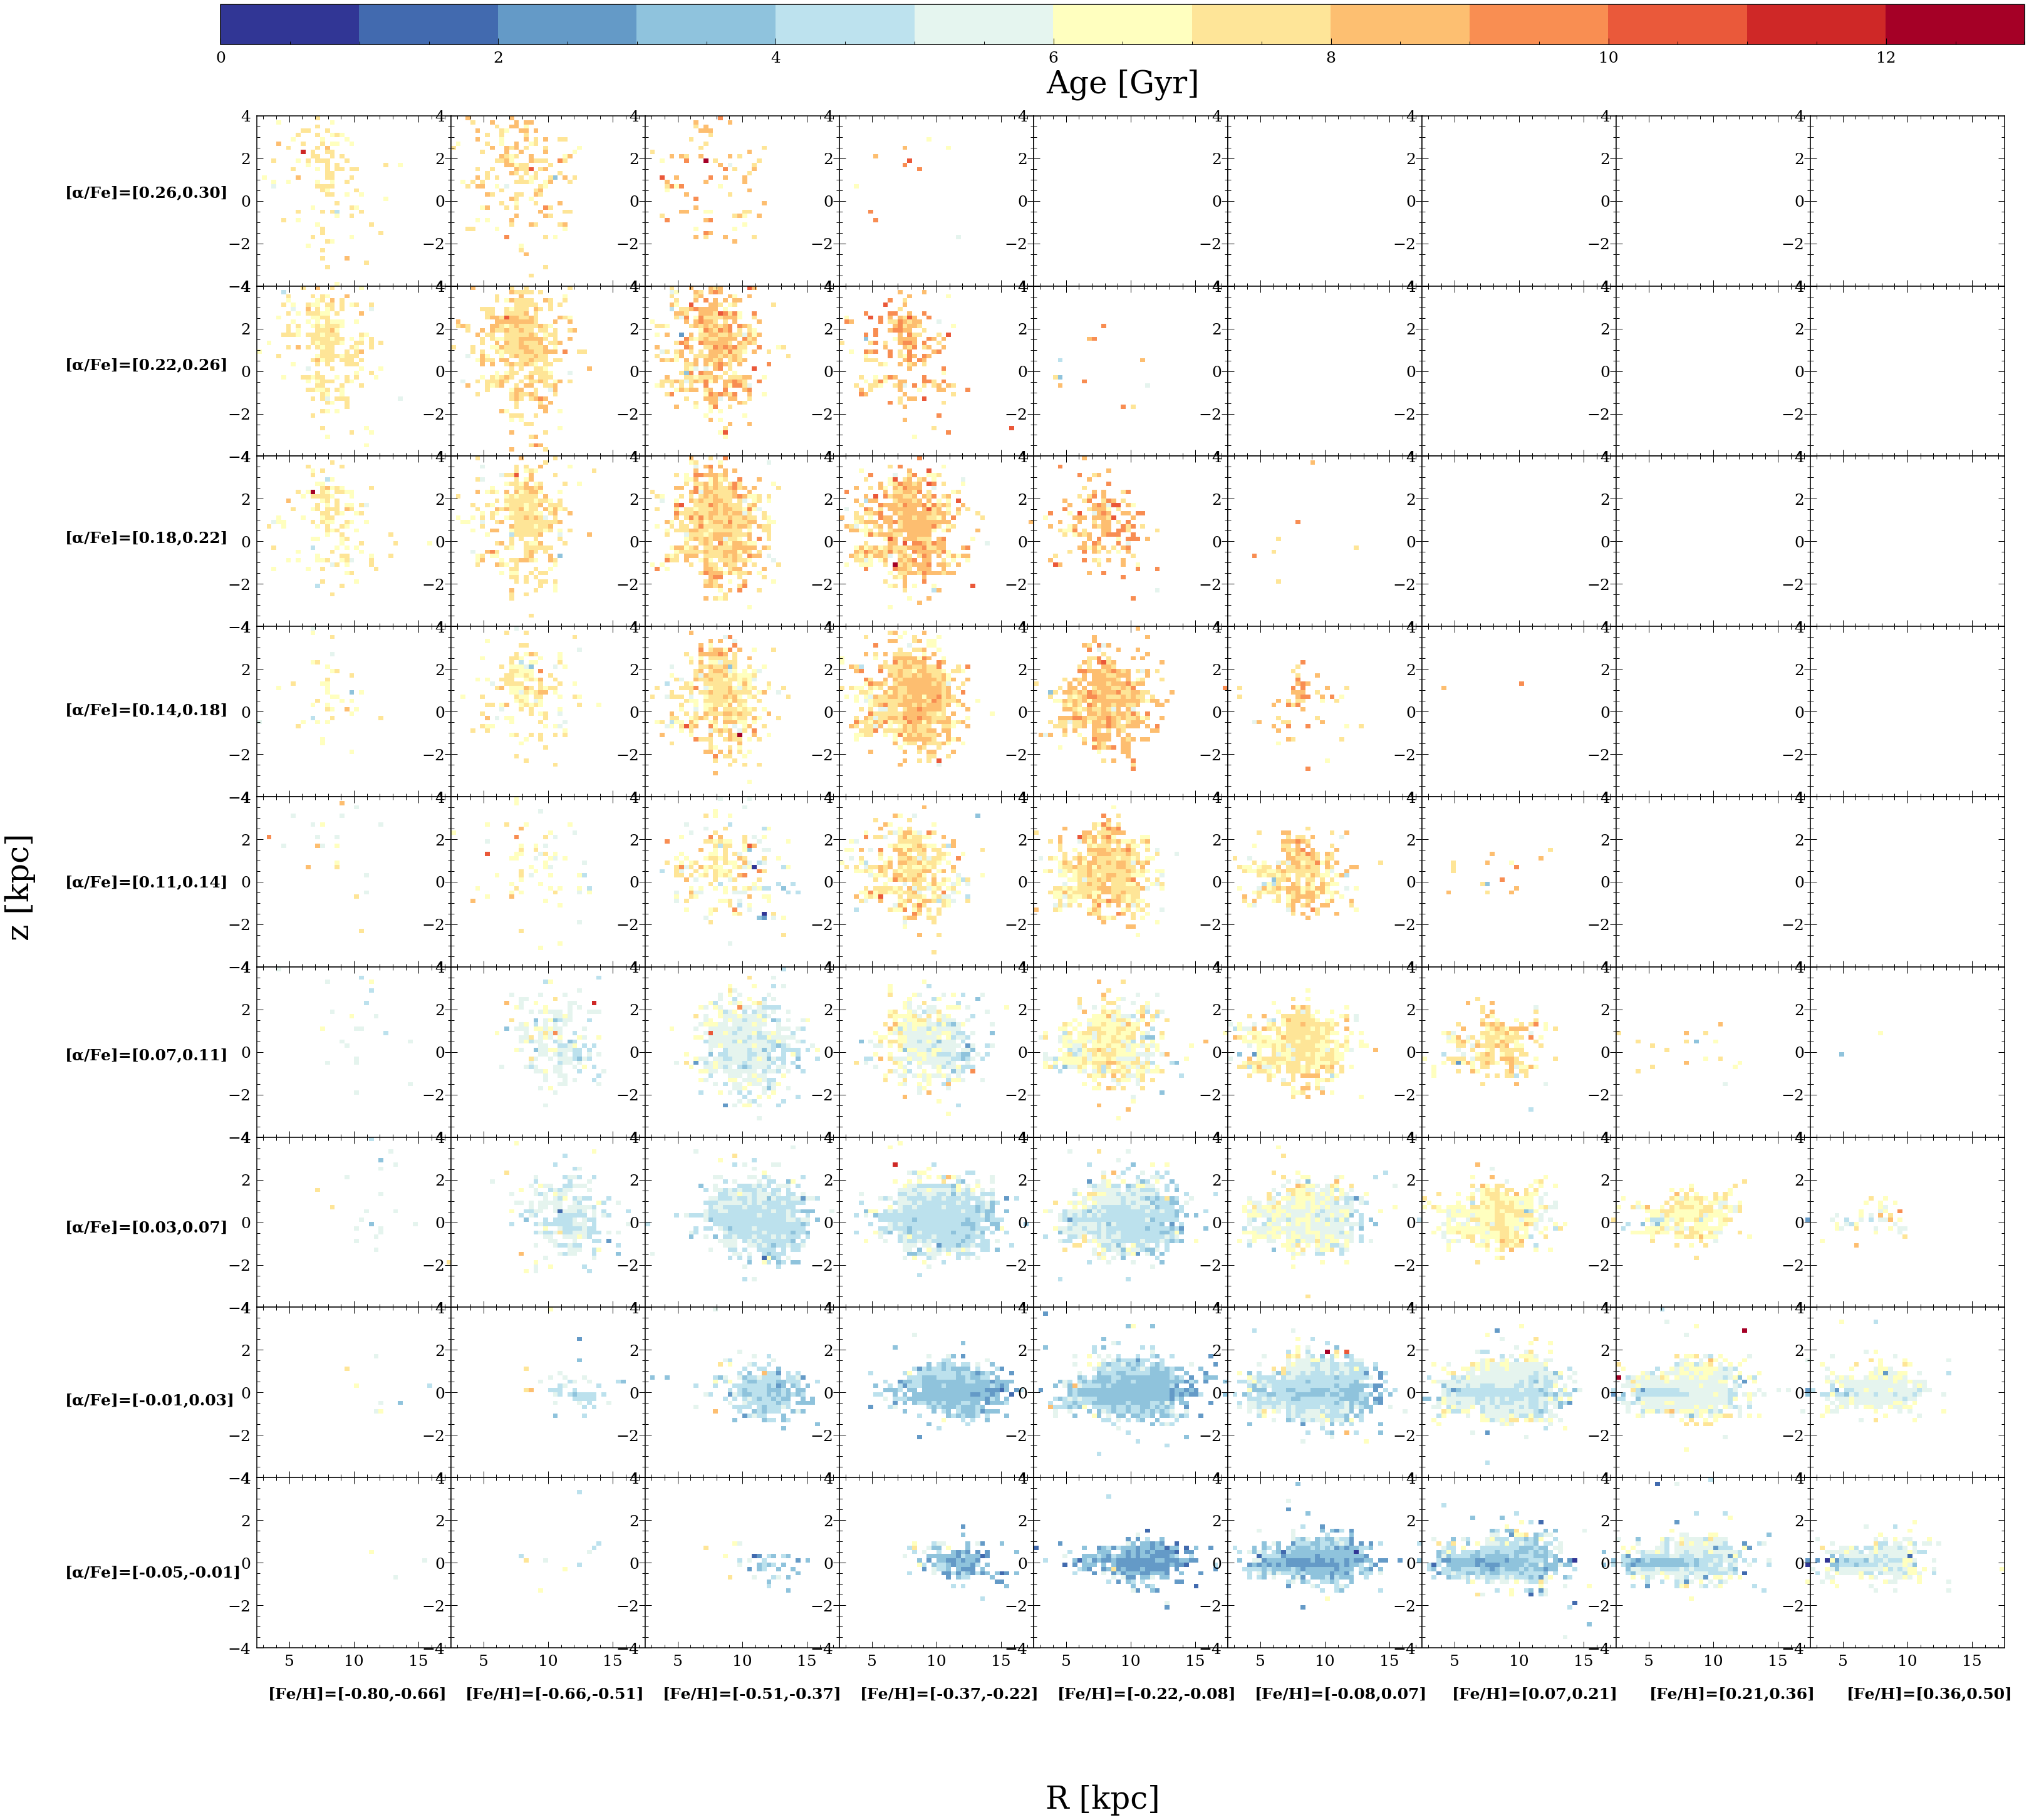

In [30]:
from scipy.ndimage import gaussian_filter

#Febin=np.linspace(-0.8,0.5,10)
#alpha=np.linspace(0.3,-0.05,10)
Febin=np.linspace(-0.8,0.5,10)
alpha=np.linspace(0.3,-0.05,10)

#plt.figure(figsize=(len(Febin)*10-10,len(alpha)*10-10))

x1,x2,y1,y2 = 2.5,17.5,-4,4
lims = [x1,x2,y1,y2]
lims = np.array(lims)
binnum = 40

#df_CM=df_CM.loc[df_CM['Age_err']<5]
print(len(cmage))

fig, axarr = plt.subplots(len(alpha)-1,len(Febin)-1,gridspec_kw={'hspace': 0, 'wspace': 0},
                          figsize=(len(Febin)*5,len(alpha)*5-5))
count=0

for i in range(len(alpha)-1):
    print(i/(len(alpha)-1))
    clear_output(wait = True)
    
    df_all=cmage.loc[cmage['ALPHA_M']>alpha[i+1]]
    df_all=df_all.loc[df_all['ALPHA_M']<alpha[i]]
    #print(len(df_all))
    
    for j in trange(len(Febin)-1):
        df_all_z=df_all.loc[(df_all['M_H'])>Febin[j]]
        df_all_z=df_all_z.loc[(df_all_z['M_H'])<Febin[j+1]]
        
        #print(len(df_all_z))
        image=makeagemap_each(df_all_z['R'].values,df_all_z['z'].values,
                df_all_z['age'].values,lims, binnum)
        
        
        cmap1 = plt.cm.get_cmap('RdYlBu_r',13)
        cmap1.set_bad('white',1.)
    
        x1m,x2m,y1m,y2m = lims[0], lims[1], lims[2], lims[3]
        
        im=axarr[i,j].imshow(image.T, interpolation="nearest" ,aspect = 'auto',origin = 'lower', 
                   extent = (x1m,x2m, y1m,y2m),cmap=cmap1, vmin=0,vmax=13)
 
        count=count+1
    
        #plt.subplots_adjust(bottom=0.20)
        #plt.xlabel("R [kpc]",fontsize = 20,labelpad =5)
        #plt.ylabel("z [kpc]" ,fontsize = 20)
    
        #cb=plt.colorbar(orientation = 'horizontal', shrink=.75)
        #fs = 20
        #cb.set_label('Age [Gyr]',fontsize = fs,labelpad = 5)
        #fs = 30 
        
        plt.xlim(x1m,x2m)
        plt.ylim(y1m,y2m)

        #count=count+1
        #plt.title('%.2f<[Fe/H]<%.2f,%.2f<[$\\alpha$/Fe]<%.2f'%(Febin[j],Febin[j+1],alpha[i+1],alpha[i]),fontsize=25)
        #plt.tight_layout()
cb_ax = fig.add_axes([0.109, 0.915, 0.8, 0.02])
cbar = fig.colorbar(im, cax=cb_ax,orientation = 'horizontal')
car = cbar.set_label('Age [Gyr]',fontsize = 50,labelpad = 5)


fig.text(0.02, 0.5, 'z [kpc]', ha='center', va='center', rotation='vertical',fontsize=50)
fig.text(0.5, 0.05, 'R [kpc]', ha='center', va='center', rotation='horizontal',fontsize=50)

for i in range(10-1):
    fig.text(0.04, 0.16+0.085*i, '[α/Fe]=[%.2f,%.2f]'%(0.3-alpha[i]-0.05,0.3-alpha[i+1]-0.05), rotation='horizontal',
             fontsize=25, fontweight='bold')
    fig.text(0.13+0.0875*i, 0.1, '[Fe/H]=[%.2f,%.2f]'%(Febin[i],Febin[i+1]), rotation='horizontal',
             fontsize=25, fontweight='bold')
        





100%|██████████| 9/9 [00:00<00:00, 56.54it/s]


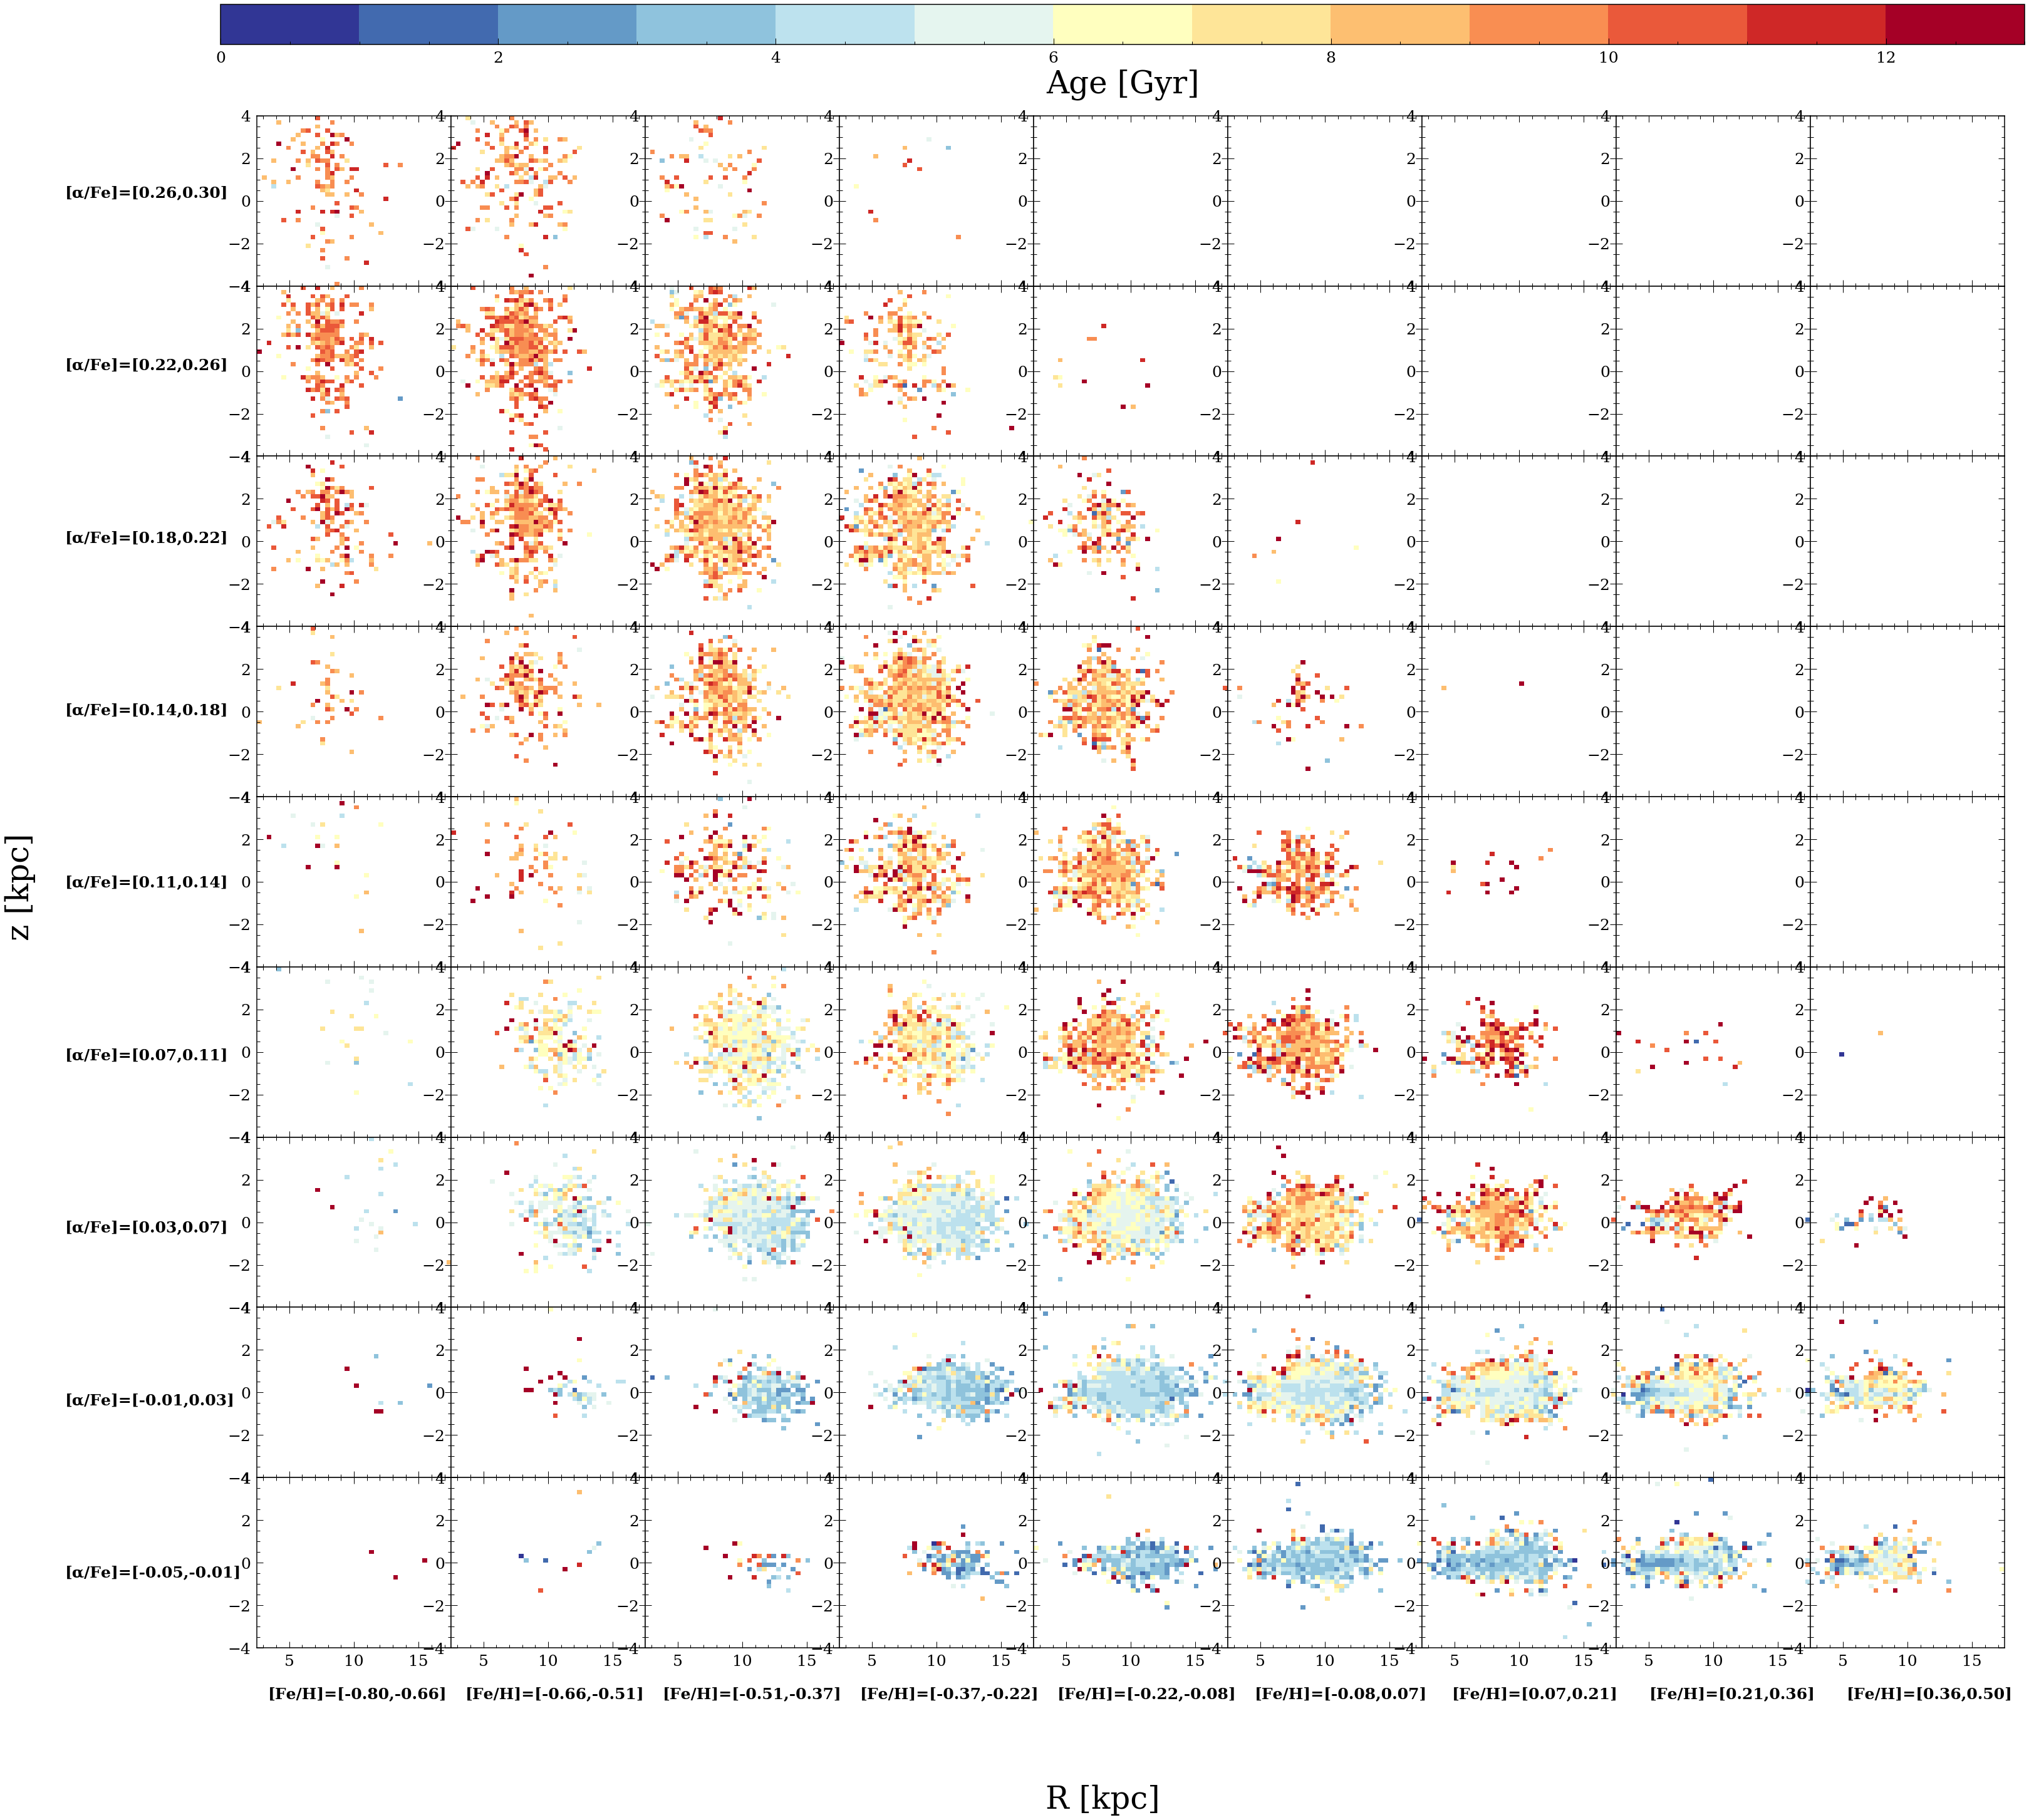

In [95]:
from scipy.ndimage import gaussian_filter

#Febin=np.linspace(-0.8,0.5,10)
#alpha=np.linspace(0.3,-0.05,10)
Febin=np.linspace(-0.8,0.5,10)
alpha=np.linspace(0.3,-0.05,10)

#plt.figure(figsize=(len(Febin)*10-10,len(alpha)*10-10))

x1,x2,y1,y2 = 2.5,17.5,-4,4
lims = [x1,x2,y1,y2]
lims = np.array(lims)
binnum = 40

#df_CM=df_CM.loc[df_CM['Age_err']<5]
print(len(cmage))

fig, axarr = plt.subplots(len(alpha)-1,len(Febin)-1,gridspec_kw={'hspace': 0, 'wspace': 0},
                          figsize=(len(Febin)*5,len(alpha)*5-5))
count=0

for i in range(len(alpha)-1):
    print(i/(len(alpha)-1))
    clear_output(wait = True)
    
    df_all=cmage.loc[cmage['ALPHA_M']>alpha[i+1]]
    df_all=df_all.loc[df_all['ALPHA_M']<alpha[i]]
    #print(len(df_all))
    
    for j in trange(len(Febin)-1):
        df_all_z=df_all.loc[(df_all['M_H'])>Febin[j]]
        df_all_z=df_all_z.loc[(df_all_z['M_H'])<Febin[j+1]]
        
        #print(len(df_all_z))
        image=makeagemap_each(df_all_z['R'].values,df_all_z['z'].values,
                df_all_z['Age'].values,lims, binnum)
        
        
        cmap1 = plt.cm.get_cmap('RdYlBu_r',13)
        cmap1.set_bad('white',1.)
    
        x1m,x2m,y1m,y2m = lims[0], lims[1], lims[2], lims[3]
        
        im=axarr[i,j].imshow(image.T, interpolation="nearest" ,aspect = 'auto',origin = 'lower', 
                   extent = (x1m,x2m, y1m,y2m),cmap=cmap1, vmin=0,vmax=13)
 
        count=count+1
    
        #plt.subplots_adjust(bottom=0.20)
        #plt.xlabel("R [kpc]",fontsize = 20,labelpad =5)
        #plt.ylabel("z [kpc]" ,fontsize = 20)
    
        #cb=plt.colorbar(orientation = 'horizontal', shrink=.75)
        #fs = 20
        #cb.set_label('Age [Gyr]',fontsize = fs,labelpad = 5)
        #fs = 30 
        
        plt.xlim(x1m,x2m)
        plt.ylim(y1m,y2m)

        #count=count+1
        #plt.title('%.2f<[Fe/H]<%.2f,%.2f<[$\\alpha$/Fe]<%.2f'%(Febin[j],Febin[j+1],alpha[i+1],alpha[i]),fontsize=25)
        #plt.tight_layout()
cb_ax = fig.add_axes([0.109, 0.915, 0.8, 0.02])
cbar = fig.colorbar(im, cax=cb_ax,orientation = 'horizontal')
car = cbar.set_label('Age [Gyr]',fontsize = 50,labelpad = 5)


fig.text(0.02, 0.5, 'z [kpc]', ha='center', va='center', rotation='vertical',fontsize=50)
fig.text(0.5, 0.05, 'R [kpc]', ha='center', va='center', rotation='horizontal',fontsize=50)

for i in range(10-1):
    fig.text(0.04, 0.16+0.085*i, '[α/Fe]=[%.2f,%.2f]'%(0.3-alpha[i]-0.05,0.3-alpha[i+1]-0.05), rotation='horizontal',
             fontsize=25, fontweight='bold')
    fig.text(0.13+0.0875*i, 0.1, '[Fe/H]=[%.2f,%.2f]'%(Febin[i],Febin[i+1]), rotation='horizontal',
             fontsize=25, fontweight='bold')
        






In [19]:
traininig=pd.read_pickle('Vrard2016_CM.pkl')
traininig

,KIC,Dnu,DPi1,e_DPi1,q,M,e_M,Alias,Measure,Status,...,GAIA_PHOT_BP_MEAN_MAG,GAIA_PHOT_RP_MEAN_MAG,GAIA_RADIAL_VELOCITY,GAIA_RADIAL_VELOCITY_ERROR,GAIA_R_EST,GAIA_R_LO,GAIA_R_HI,TEFF_SPEC,LOGG_SPEC,KID
0,3459347,3.96,304.9,3.55,0.45,2.22,0.19,0,2,2,...,12.915147,11.719396,-3.251830,1.489939,3722.789912,3355.408788,4177.327117,5080.700195,2.7857,3459347
1,1026084,4.45,251.2,2.89,0.31,2.43,0.23,0,2,2,...,11.264221,9.734577,14.622233,0.213846,1501.176873,1453.622257,1551.886121,4411.299805,2.5023,1026084
2,1027337,6.95,70.1,0.36,0.09,1.57,0.08,0,2,0,...,12.669947,11.320031,-28.212716,0.584146,1365.255020,1323.671098,1409.484955,4564.500000,2.9858,1027337
3,1162746,3.81,255.6,12.52,0.27,0.89,0.09,0,1,1,...,11.996258,10.740301,-114.665310,0.522337,1300.861092,1259.198291,1345.320662,4726.700195,2.6848,1162746
4,1161618,4.07,327.5,3.61,0.49,1.31,0.08,0,2,1,...,10.757635,9.483814,-47.135158,0.181371,786.943035,771.907531,802.564940,4683.899902,2.8143,1161618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6106,11122147,13.35,79.8,1.08,0.19,1.55,0.09,0,2,0,...,13.262649,12.131044,-9999.000000,-9999.000000,1429.300777,1374.066544,1489.064075,5017.399902,3.3380,11122147
6107,11175822,4.23,321.5,30.89,0.07,0.80,0.06,0,1,1,...,13.367426,12.191577,11.405611,1.698859,3326.987755,3070.745054,3627.695503,4948.799805,2.7905,11175822
6108,11175619,3.78,265.2,1.94,0.29,0.92,0.07,0,2,1,...,11.036759,9.817907,-104.906418,0.382132,938.658369,919.246194,958.892441,4666.100098,2.6351,11175619
6109,11228554,4.41,293.2,3.27,0.29,1.28,0.11,0,2,1,...,11.469304,10.299173,-99.731227,0.841193,859.695712,842.462869,877.634882,4714.600098,2.7214,11228554


In [27]:
def convd2R(rad):
    return rad/180*np.pi
traininig['X'] = traininig.GAIA_R_EST * np.cos(convd2R(traininig.GLAT)) * np.cos(convd2R(traininig.GLON)) / 1000.
traininig['Y'] = -traininig.GAIA_R_EST * np.sin(convd2R(traininig.GLON)) * np.cos(convd2R(traininig.GLAT))/ 1000.
traininig['z'] = traininig.GAIA_R_EST * np.sin(convd2R(traininig.GLAT))/ 1000.
traininig['R'] = np.sqrt(np.power(traininig.X - 8.2,2.) + np.power(traininig.Y,2.))


In [33]:
df2=pd.read_table('AstroAges.csv',delimiter=',')
traininig=pd.merge(traininig,df2,left_on='KIC',right_on='KIC',how='inner')


In [96]:
len(traininig)

2992

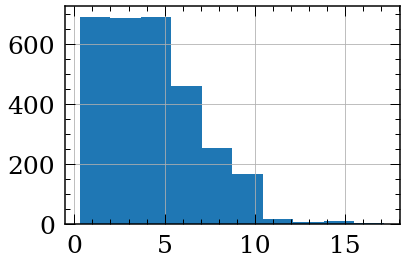

In [42]:
traininig['Age']=np.power(10,traininig['LogAge'])/1000
traininig['Age'].hist()

100%|██████████| 9/9 [00:00<00:00, 173.77it/s]


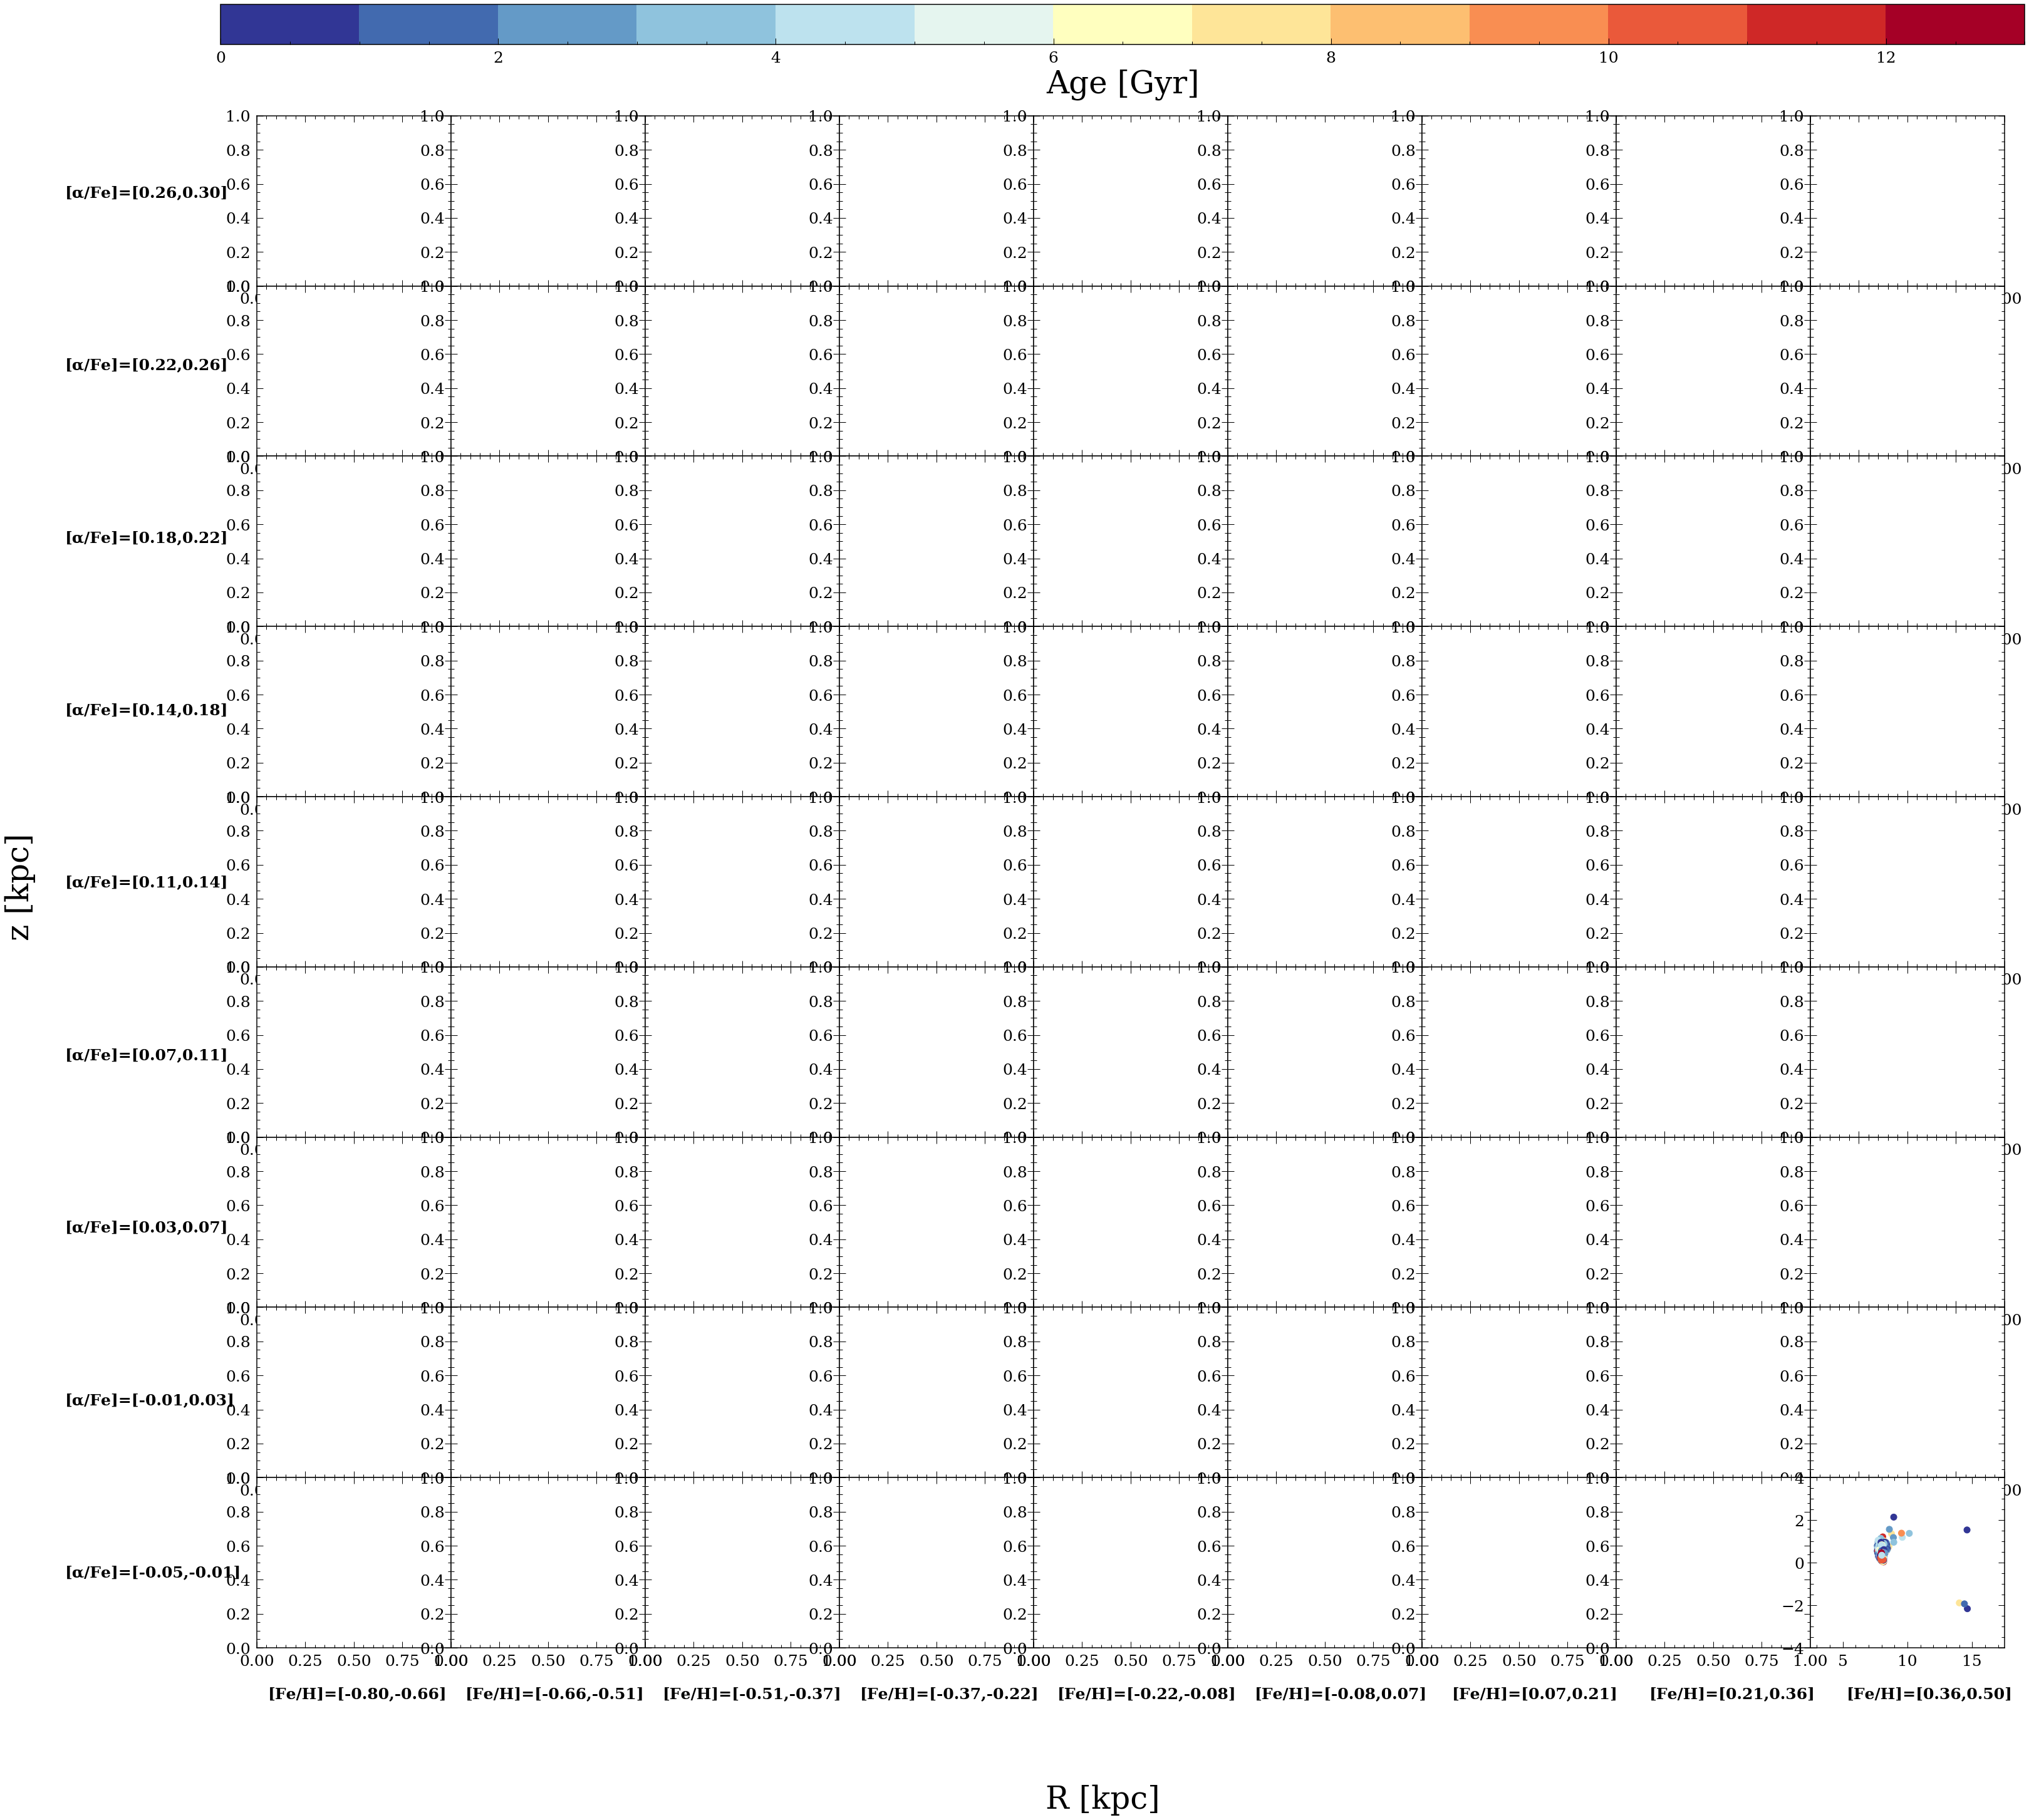

In [63]:
from scipy.ndimage import gaussian_filter

#Febin=np.linspace(-0.8,0.5,10)
#alpha=np.linspace(0.3,-0.05,10)
Febin=np.linspace(-0.8,0.5,10)
alpha=np.linspace(0.3,-0.05,10)

#plt.figure(figsize=(len(Febin)*10-10,len(alpha)*10-10))

x1,x2,y1,y2 = 2.5,17.5,-4,4
lims = [x1,x2,y1,y2]
lims = np.array(lims)
binnum = 40

#df_CM=df_CM.loc[df_CM['Age_err']<5]
print(len(cmage))

fig, axarr = plt.subplots(len(alpha)-1,len(Febin)-1,gridspec_kw={'hspace': 0, 'wspace': 0},
                          figsize=(len(Febin)*5,len(alpha)*5-5))
count=0

for i in range(len(alpha)-1):
    print(i/(len(alpha)-1))
    clear_output(wait = True)
    
    df_all=traininig.loc[traininig['ALPHA_M']>alpha[i+1]]
    df_all=df_all.loc[df_all['ALPHA_M']<alpha[i]]
    #print(len(df_all))
    
    for j in trange(len(Febin)-1):
        df_all_z=df_all.loc[(df_all['M_H'])>Febin[j]]
        df_all_z=df_all_z.loc[(df_all_z['M_H'])<Febin[j+1]]
        
        cmap1 = plt.cm.get_cmap('RdYlBu_r',13)
        cmap1.set_bad('white',1.)
        #print(len(df_all_z))
        plt.scatter(df_all_z['R'].values,df_all_z['z'].values,
                c=df_all_z['Age'].values,s=100,cmap=cmap1)
        

        count=count+1
    
        #plt.subplots_adjust(bottom=0.20)
        #plt.xlabel("R [kpc]",fontsize = 20,labelpad =5)
        #plt.ylabel("z [kpc]" ,fontsize = 20)
    
        #cb=plt.colorbar(orientation = 'horizontal', shrink=.75)
        #fs = 20
        #cb.set_label('Age [Gyr]',fontsize = fs,labelpad = 5)
        #fs = 30 
        
        plt.xlim(x1m,x2m)
        plt.ylim(y1m,y2m)

        #count=count+1
        #plt.title('%.2f<[Fe/H]<%.2f,%.2f<[$\\alpha$/Fe]<%.2f'%(Febin[j],Febin[j+1],alpha[i+1],alpha[i]),fontsize=25)
        #plt.tight_layout()
cb_ax = fig.add_axes([0.109, 0.915, 0.8, 0.02])
cbar = fig.colorbar(im, cax=cb_ax,orientation = 'horizontal')
car = cbar.set_label('Age [Gyr]',fontsize = 50,labelpad = 5)


fig.text(0.02, 0.5, 'z [kpc]', ha='center', va='center', rotation='vertical',fontsize=50)
fig.text(0.5, 0.05, 'R [kpc]', ha='center', va='center', rotation='horizontal',fontsize=50)

for i in range(10-1):
    fig.text(0.04, 0.16+0.085*i, '[α/Fe]=[%.2f,%.2f]'%(0.3-alpha[i]-0.05,0.3-alpha[i+1]-0.05), rotation='horizontal',
             fontsize=25, fontweight='bold')
    fig.text(0.13+0.0875*i, 0.1, '[Fe/H]=[%.2f,%.2f]'%(Febin[i],Febin[i+1]), rotation='horizontal',
             fontsize=25, fontweight='bold')
        






In [93]:
m1=(traininig['ALPHA_M'].values>0.14) & (traininig['ALPHA_M'].values<0.3)
m2=(traininig['M_H'].values>-0.8) & (traininig['M_H'].values<-0.66)
m=m1&m2

(7.05206426765936, 18)

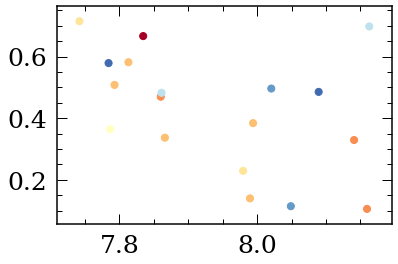

In [94]:
cmap1 = plt.cm.get_cmap('RdYlBu_r',13)
plt.scatter(traininig[m]['R'].values,traininig[m]['z'].values,c=traininig[m]['Age'].values,s=50,cmap=cmap1,
           vmin=0,vmax=13)
#plt.xlim(x1m,x2m)
#plt.ylim(y1m,y2m)
np.average(traininig[m].Age),len(traininig[m])


In [86]:
m3=(traininig['M_H'].values>-0.66) & (traininig['M_H'].values<-0.51)
m=m1&m3

(6.505650163405076, 37)

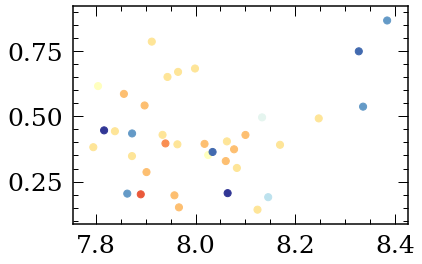

In [87]:
cmap1 = plt.cm.get_cmap('RdYlBu_r',13)
plt.scatter(traininig[m]['R'].values,traininig[m]['z'].values,c=traininig[m]['Age'].values,s=50,cmap=cmap1,
           vmin=0,vmax=13)
#plt.xlim(x1m,x2m)
#plt.ylim(y1m,y2m)
np.average(traininig[m].Age),len(traininig[m])

In [88]:
m4=(traininig['M_H'].values>-0.51) & (traininig['M_H'].values<-0.37)
m=m1&m4

(nan, 74)

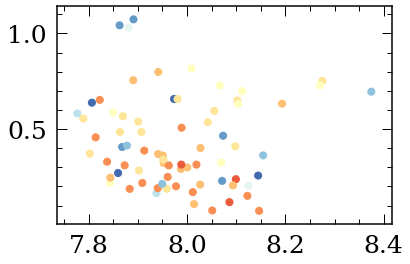

In [89]:
cmap1 = plt.cm.get_cmap('RdYlBu_r',13)
plt.scatter(traininig[m]['R'].values,traininig[m]['z'].values,c=traininig[m]['Age'].values,s=50,cmap=cmap1,
           vmin=0,vmax=13)
#plt.xlim(x1m,x2m)
#plt.ylim(y1m,y2m)
np.average(traininig[m].Age),len(traininig[m])